In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import sqlite3

conn = sqlite3.connect('../Data/heart_disease.db')


df = pd.read_sql("SELECT * FROM cardiac_records", conn)

print(df.head())

conn.close()

   Patient_id  Age     Sex Data_source    ChestPainType  RestingBP  \
0           1   63    Male   Cleveland   typical angina      145.0   
1           2   67    Male   Cleveland     asymptomatic      160.0   
2           3   67    Male   Cleveland     asymptomatic      120.0   
3           4   37    Male   Cleveland      non-anginal      130.0   
4           5   41  Female   Cleveland  atypical angina      130.0   

   Cholesterol  FastingBS      RestingECG  thalch  ExerciseAngina  OldPeak  \
0        233.0        1.0  lv hypertrophy   150.0             0.0      2.3   
1        286.0        0.0  lv hypertrophy   108.0             1.0      1.5   
2        229.0        0.0  lv hypertrophy   129.0             1.0      2.6   
3        250.0        0.0          normal   187.0             0.0      3.5   
4        204.0        0.0  lv hypertrophy   172.0             0.0      1.4   

      ST_Slope  MajorVessels        Thalassemia  DiagnosisResult  
0  downsloping           0.0       fixed de

In [3]:
df1 = df.copy()

In [4]:
df1 = df1.drop(['Patient_id','Data_source'], axis = 1)

In [5]:
df1.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'thalch', 'ExerciseAngina', 'OldPeak', 'ST_Slope',
       'MajorVessels', 'Thalassemia', 'DiagnosisResult'],
      dtype='object')

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              920 non-null    int64  
 1   Sex              920 non-null    object 
 2   ChestPainType    920 non-null    object 
 3   RestingBP        861 non-null    float64
 4   Cholesterol      890 non-null    float64
 5   FastingBS        830 non-null    float64
 6   RestingECG       918 non-null    object 
 7   thalch           865 non-null    float64
 8   ExerciseAngina   865 non-null    float64
 9   OldPeak          858 non-null    float64
 10  ST_Slope         611 non-null    object 
 11  MajorVessels     309 non-null    float64
 12  Thalassemia      434 non-null    object 
 13  DiagnosisResult  920 non-null    int64  
dtypes: float64(7), int64(2), object(5)
memory usage: 100.8+ KB


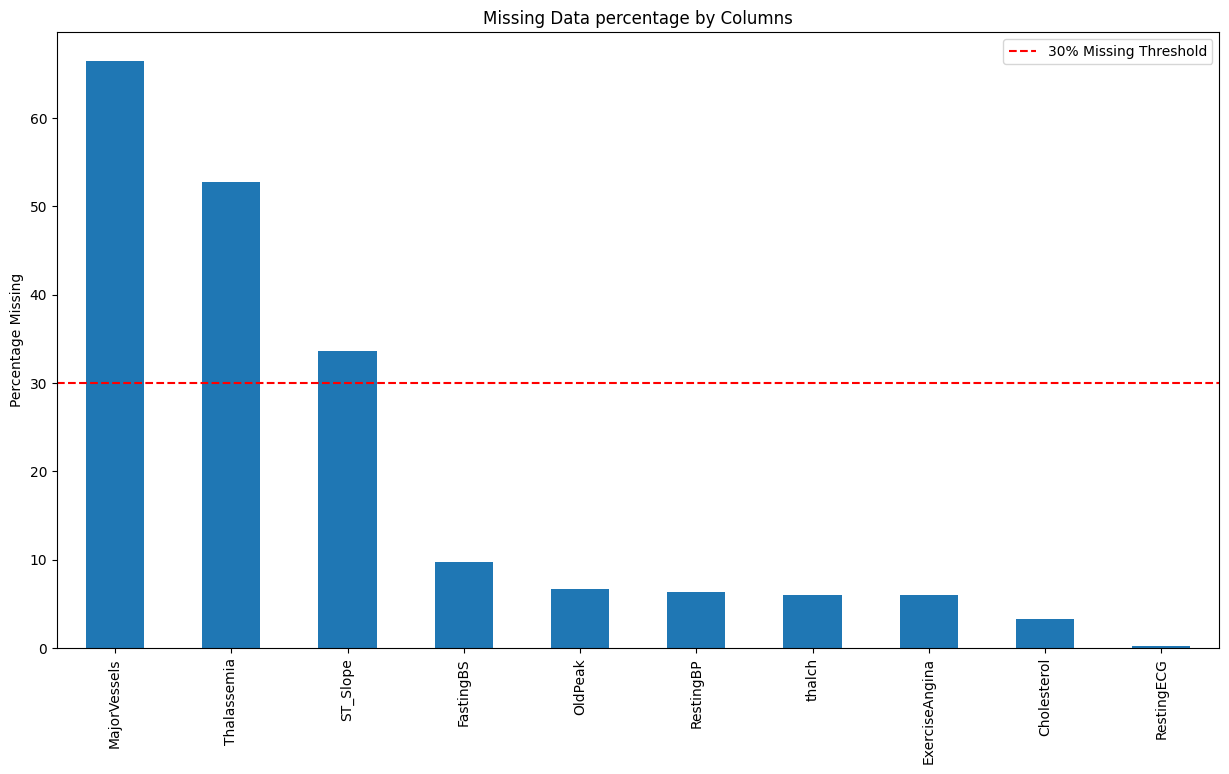

In [7]:
import matplotlib.pyplot as plt
missing_data = df1.isna().sum().sort_values(ascending = False)
missing_percent = (missing_data / len(df1)) * 100

plt.figure(figsize=(15,8))
missing_percent[missing_percent > 0].plot(kind = 'bar')
plt.title('Missing Data percentage by Columns')
plt.ylabel('Percentage Missing')
plt.axhline(y = 30, color = 'red', linestyle = '--', label = '30% Missing Threshold')
plt.legend()
plt.show()

In [8]:
df1 = df1.drop(['Thalassemia','MajorVessels'], axis = 1) 

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              920 non-null    int64  
 1   Sex              920 non-null    object 
 2   ChestPainType    920 non-null    object 
 3   RestingBP        861 non-null    float64
 4   Cholesterol      890 non-null    float64
 5   FastingBS        830 non-null    float64
 6   RestingECG       918 non-null    object 
 7   thalch           865 non-null    float64
 8   ExerciseAngina   865 non-null    float64
 9   OldPeak          858 non-null    float64
 10  ST_Slope         611 non-null    object 
 11  DiagnosisResult  920 non-null    int64  
dtypes: float64(6), int64(2), object(4)
memory usage: 86.4+ KB


In [10]:
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG']
df1[categorical_cols] = df1[categorical_cols].astype('category')
bool_cols = ['ExerciseAngina', 'FastingBS']
df1[bool_cols] = df1[bool_cols].astype('boolean')

In [11]:
df1['Heart_rate_reserve'] = (220 - df1['Age']) - df1['thalch']

In [12]:
conditions = [
    (df1['RestingBP'] < 120),
    (df1['RestingBP'] >= 120) & (df1['RestingBP'] < 130),
    (df1['RestingBP'] >= 130) & (df1['RestingBP'] < 140),
    (df1['RestingBP'] >= 140)
]

choices = ['Normal', 'Elevated', 'Hypertension_Stage_1', 'Hypertension_Stage_2']

df1['Blood Pressure Category'] = np.select(conditions, choices, default = 'unknown')

In [13]:
age_bins = [0,39, 60, np.inf]
age_labels = ['Young_Adult', 'Middle_Aged', 'Senior']

df1['Age Category'] = pd.cut(df1['Age'], bins = age_bins, labels = age_labels, include_lowest = True)

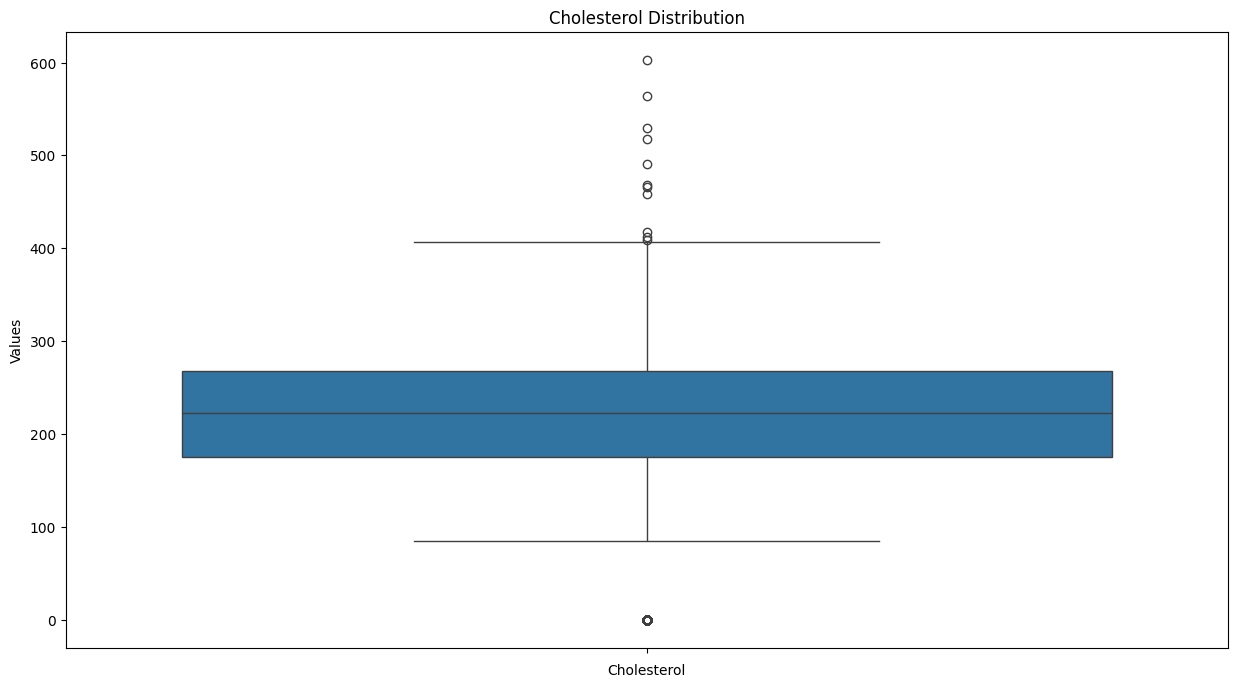

In [14]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.boxplot(y = df1['Cholesterol'])
plt.xlabel('Cholesterol')
plt.ylabel('Values')
plt.title('Cholesterol Distribution')
plt.show()

In [15]:
df1['Cholesterol'] = np.log1p(df1['Cholesterol'])

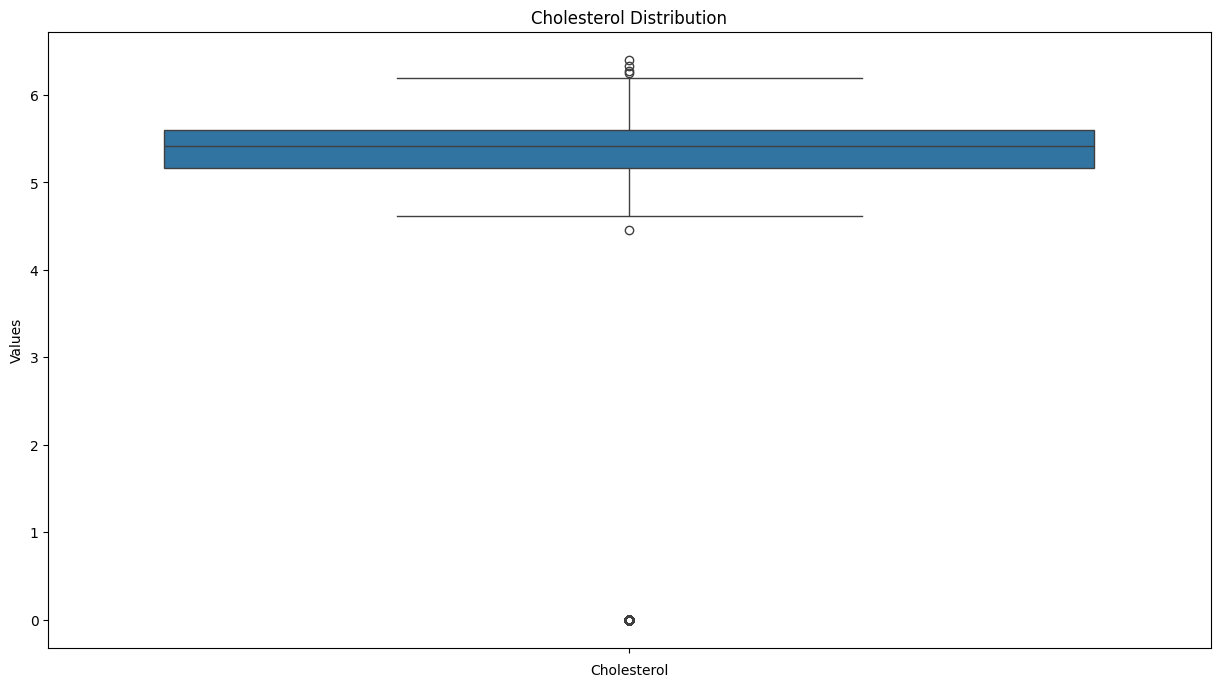

In [16]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.boxplot(y = df1['Cholesterol'])
plt.xlabel('Cholesterol')
plt.ylabel('Values')
plt.title('Cholesterol Distribution')
plt.show()

In [29]:
df1['DiagnosisResult'] = df1['DiagnosisResult'].apply(lambda x: 0 if x == 0 else 1)

In [30]:
cols_with_zeros = ['RestingBP', 'Cholesterol']

for col in cols_with_zeros:
    df1[col] = df1[col].replace({0: np.nan})

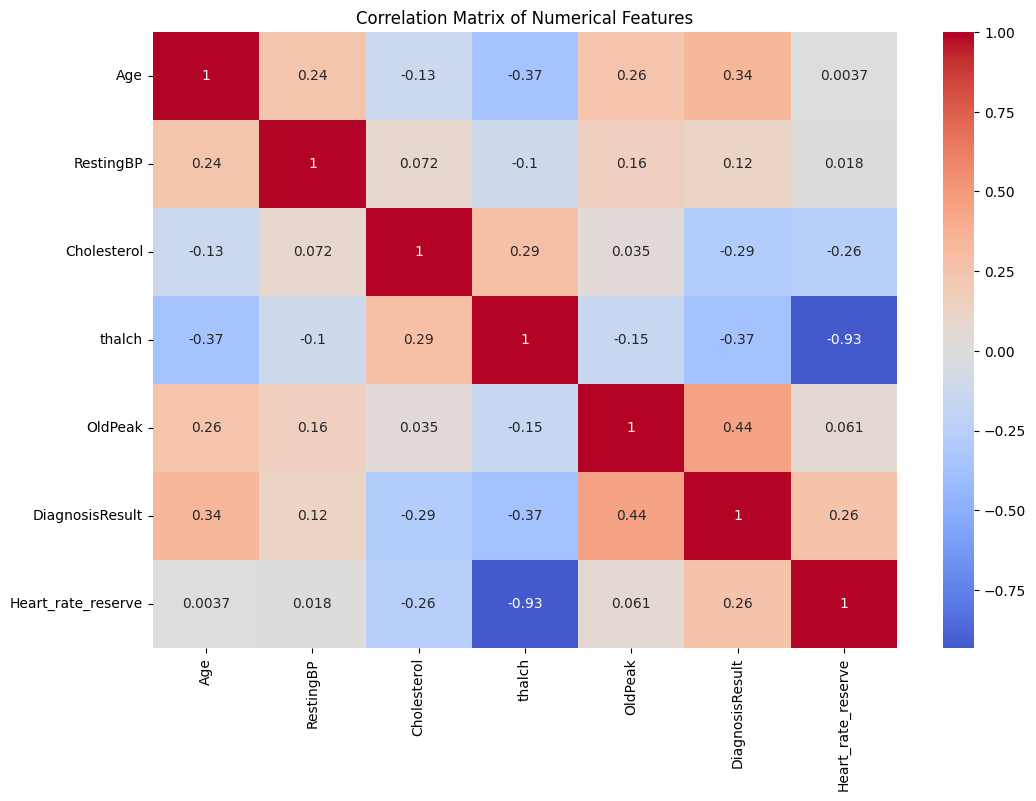

Correlation with DiagnosisResult:
DiagnosisResult       1.000000
OldPeak               0.443084
Age                   0.339596
Heart_rate_reserve    0.260829
RestingBP             0.122291
Cholesterol          -0.287168
thalch               -0.366265
Name: DiagnosisResult, dtype: float64


In [17]:
# Select only numerical columns for correlation
numerical_cols = df1.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df1[numerical_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Check correlation with target
print("Correlation with DiagnosisResult:")
print(correlation_matrix['DiagnosisResult'].sort_values(ascending=False))

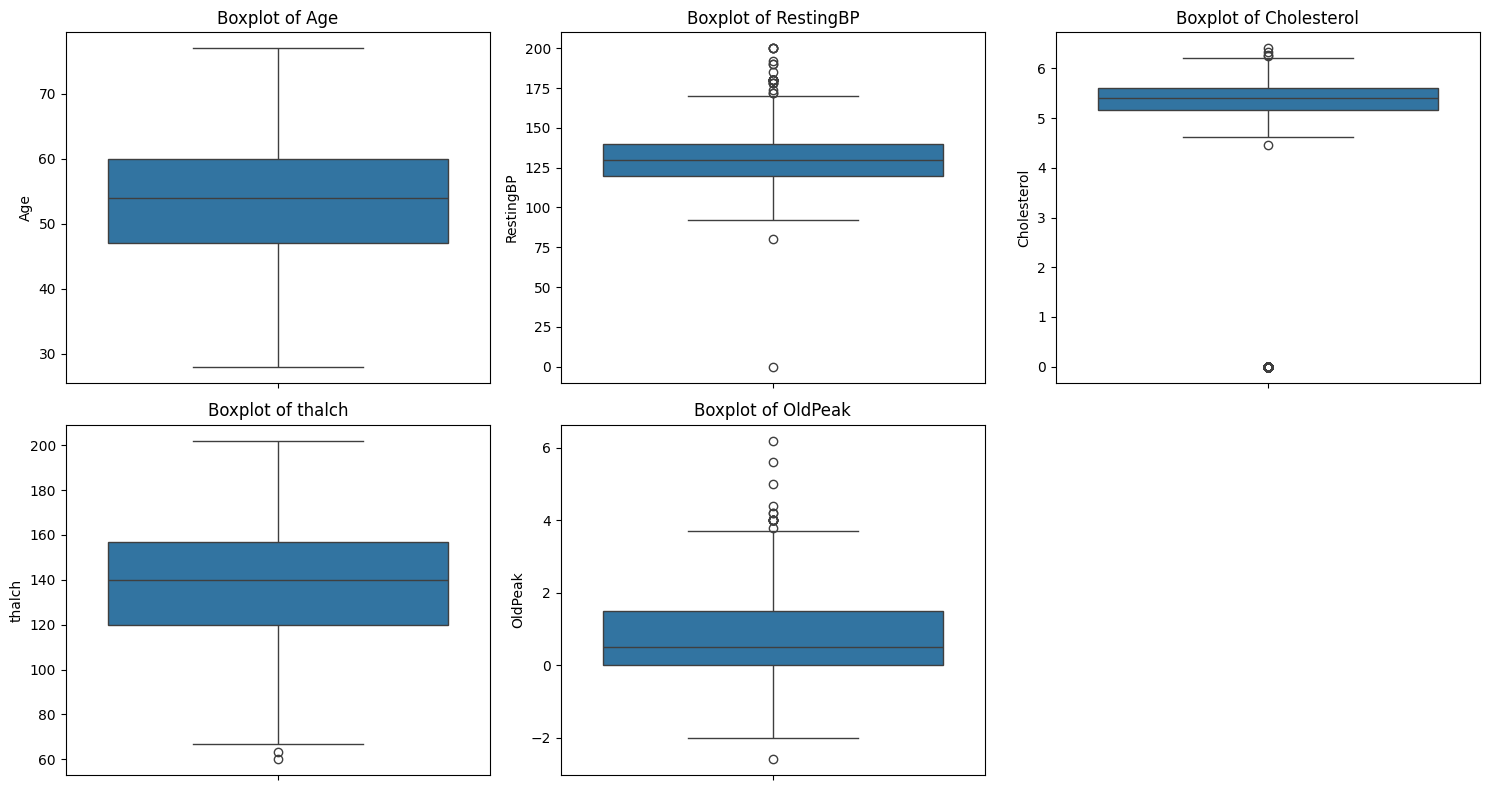

In [18]:
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'thalch', 'OldPeak']

plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df1[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      920 non-null    int64   
 1   Sex                      920 non-null    category
 2   ChestPainType            920 non-null    category
 3   RestingBP                861 non-null    float64 
 4   Cholesterol              890 non-null    float64 
 5   FastingBS                830 non-null    boolean 
 6   RestingECG               918 non-null    category
 7   thalch                   865 non-null    float64 
 8   ExerciseAngina           865 non-null    boolean 
 9   OldPeak                  858 non-null    float64 
 10  ST_Slope                 611 non-null    object  
 11  DiagnosisResult          920 non-null    int64   
 12  Heart_rate_reserve       865 non-null    float64 
 13  Blood Pressure Category  920 non-null    object  
 14  Age Catego

In [21]:
numerical = df1.select_dtypes(include=['float64','int64']).columns.tolist()
cat_oh = ['ChestPainType']
cat_lb = ['Sex']
cat_oe = ['Age Category', 'RestingECG'] 

In [22]:
numerical.remove('DiagnosisResult')

In [32]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
numerical = df1.select_dtypes(include=['float64','int64']).columns.tolist()
cat_oh = [ 'RestingECG', 'ChestPainType']
cat_oe = ['ST_Slope', 'Age Category', 'Sex', 'FastingBS', 'ExerciseAngina'] 

slope_order = ['upsloping', 'flat', 'downsloping'] 
age_order = ['Young_Adult', 'Middle_Aged', 'Senior']
sex_order = ['Female', 'Male']
bool_order = [False, True]

numerical.remove('DiagnosisResult')
numerical.remove('Age')

numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(missing_values = np.nan, strategy ='median')),
    ('StandardScaler', StandardScaler())
     ])

cat_oh_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(missing_values = np.nan, strategy='most-frequent')),
    ('one hot', OneHotEncoder(handle_unknown = 'ignore', sparse_output = False))
     ])

cat_oe_pipeline = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'constant', fill_value = 'Unknown')),
    ('Ordinal encoding', OrdinalEncoder(categories=[slope_order, age_order, sex_order, bool_order, bool_order],handle_unknown = 'use_encoded_value', unknown_value = -1))
    ])

preprocessor = ColumnTransformer([
    ('numerical_pipeline', numerical_pipeline, numerical),
    ('Categorical_one_hot_pipeline', cat_oh_pipeline, cat_oh),
    ('Categorical_ordinal_encoding', cat_oe_pipeline, cat_oe)

], remainder = 'drop'
                                )

In [31]:
columns = df1.columns.tolist()

for column in columns:
    print(f'{column} Unique values')
    print(df1[column].unique())
    print('\n')

Age Unique values
[63 67 37 41 56 62 57 53 44 52 48 54 49 64 58 60 50 66 43 40 69 59 42 55
 61 65 71 51 46 45 39 68 47 34 35 29 70 77 38 74 76 28 30 31 32 33 36 72
 73 75]


Sex Unique values
['Male', 'Female']
Categories (2, object): ['Female', 'Male']


ChestPainType Unique values
['typical angina', 'asymptomatic', 'non-anginal', 'atypical angina']
Categories (4, object): ['asymptomatic', 'atypical angina', 'non-anginal', 'typical angina']


RestingBP Unique values
[145. 160. 120. 130. 140. 172. 150. 110. 132. 117. 135. 112. 105. 124.
 125. 142. 128. 170. 155. 104. 180. 138. 108. 134. 122. 115. 118. 100.
 200.  94. 165. 102. 152. 101. 126. 174. 148. 178. 158. 192. 129. 144.
 123. 136. 146. 106. 156. 154. 114. 164.  98. 190.  nan 113.  92.  95.
  80. 185. 116.  96. 127.]


Cholesterol Unique values
[5.45532112 5.65948222 5.43807931 5.52545294 5.32300998 5.46806014
 5.59471138 5.87211779 5.54126355 5.31811999 5.26269019 5.68697536
 5.54907608 5.5759491  5.29831737 5.12989871 5.48063892